In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



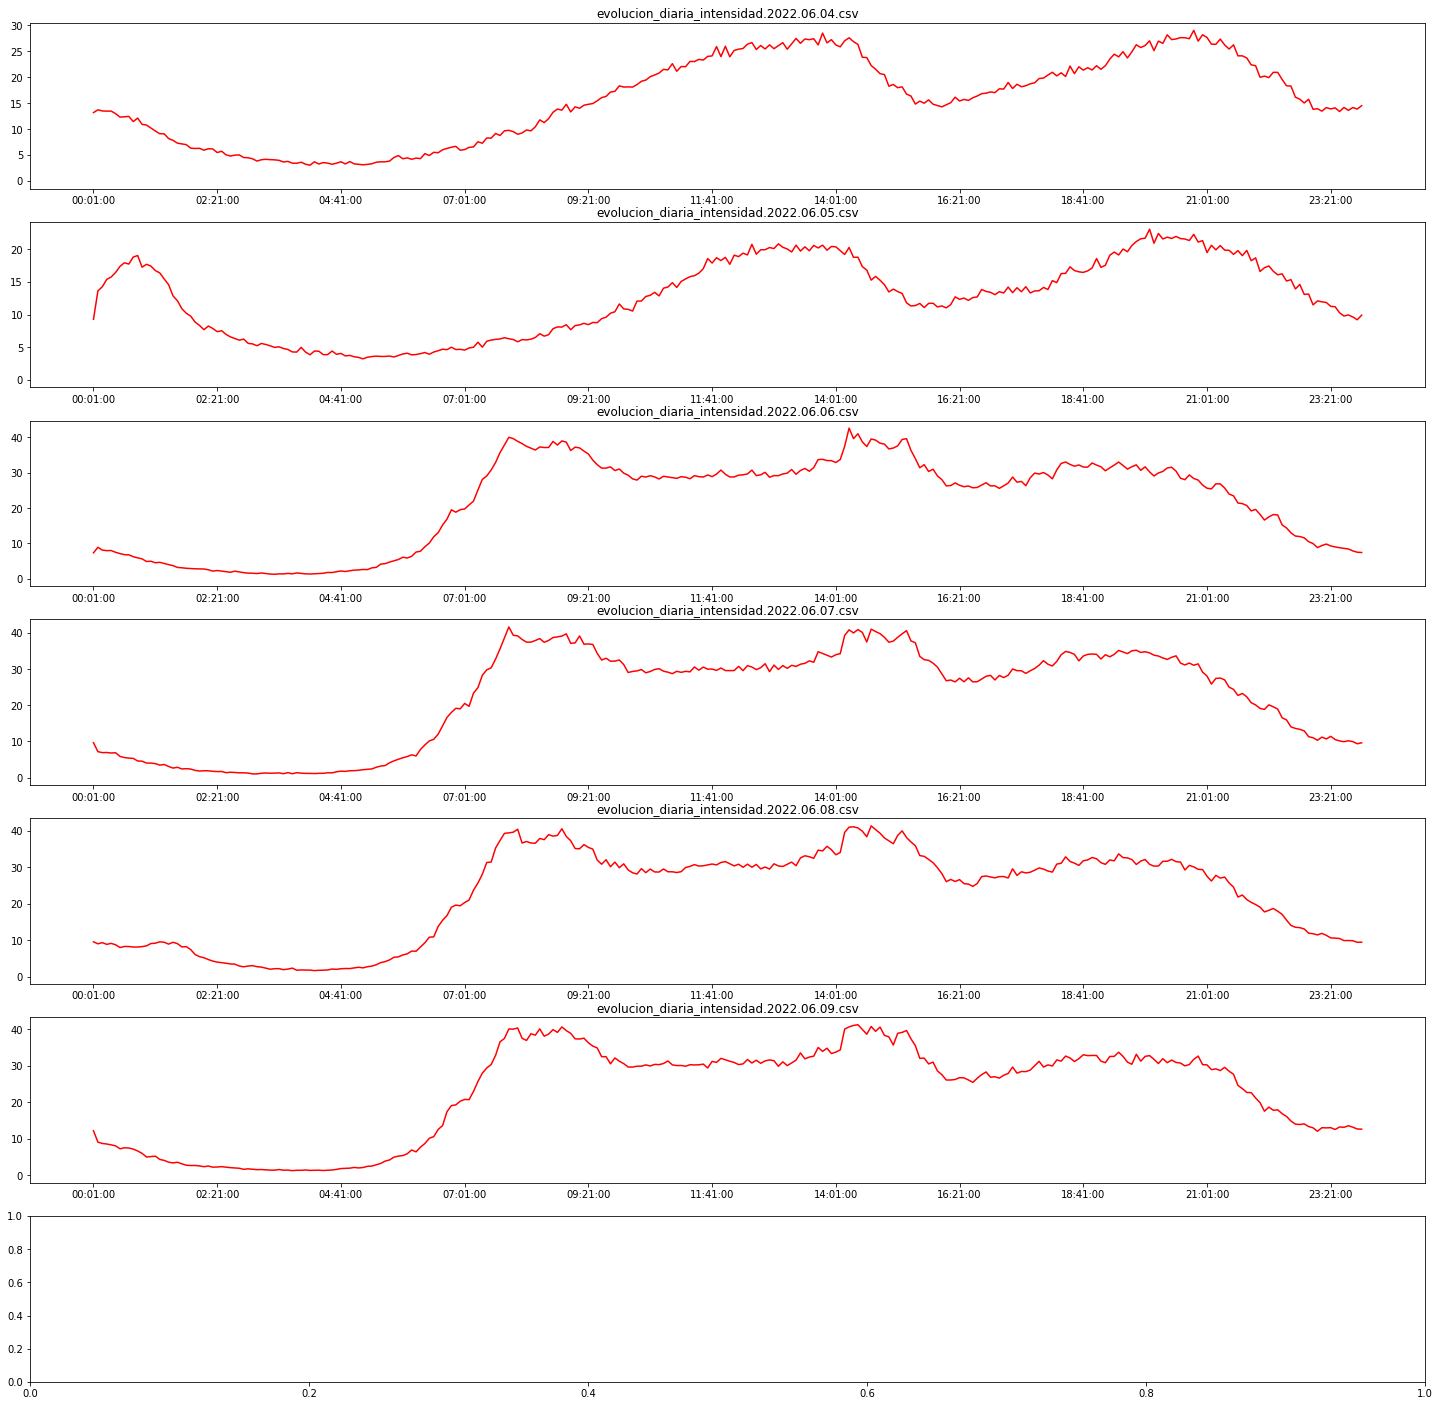

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(4,10):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2022.06.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2022.06.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  axs[i-4].set_title(fileSelected)

  axs[i-4].plot(df, color='r')




#Nochebuena 2021

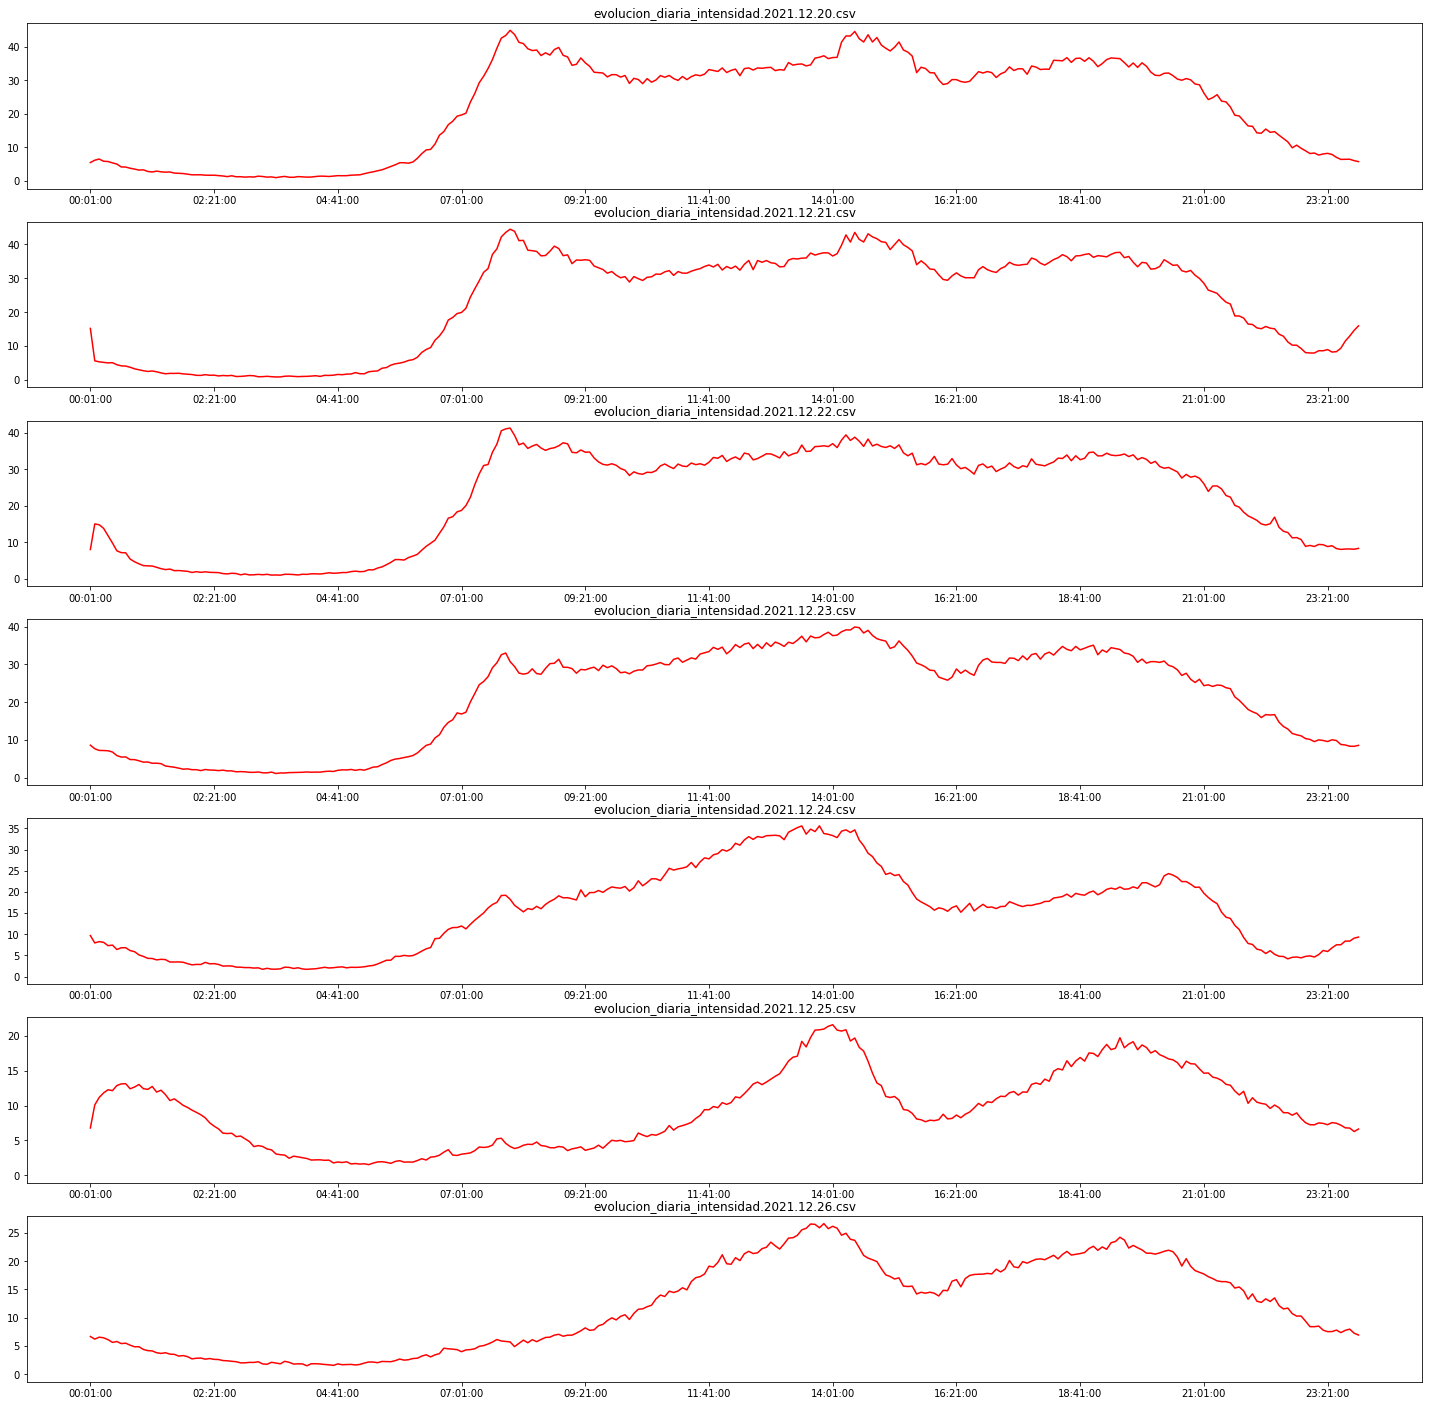

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(20,27):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2021.12.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2021.12.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-20].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-20].set_xticks(xticks)
  axs[i-20].set_title(fileSelected)
  axs[i-20].plot(df, color='r')

# Vuelta de vacaciones

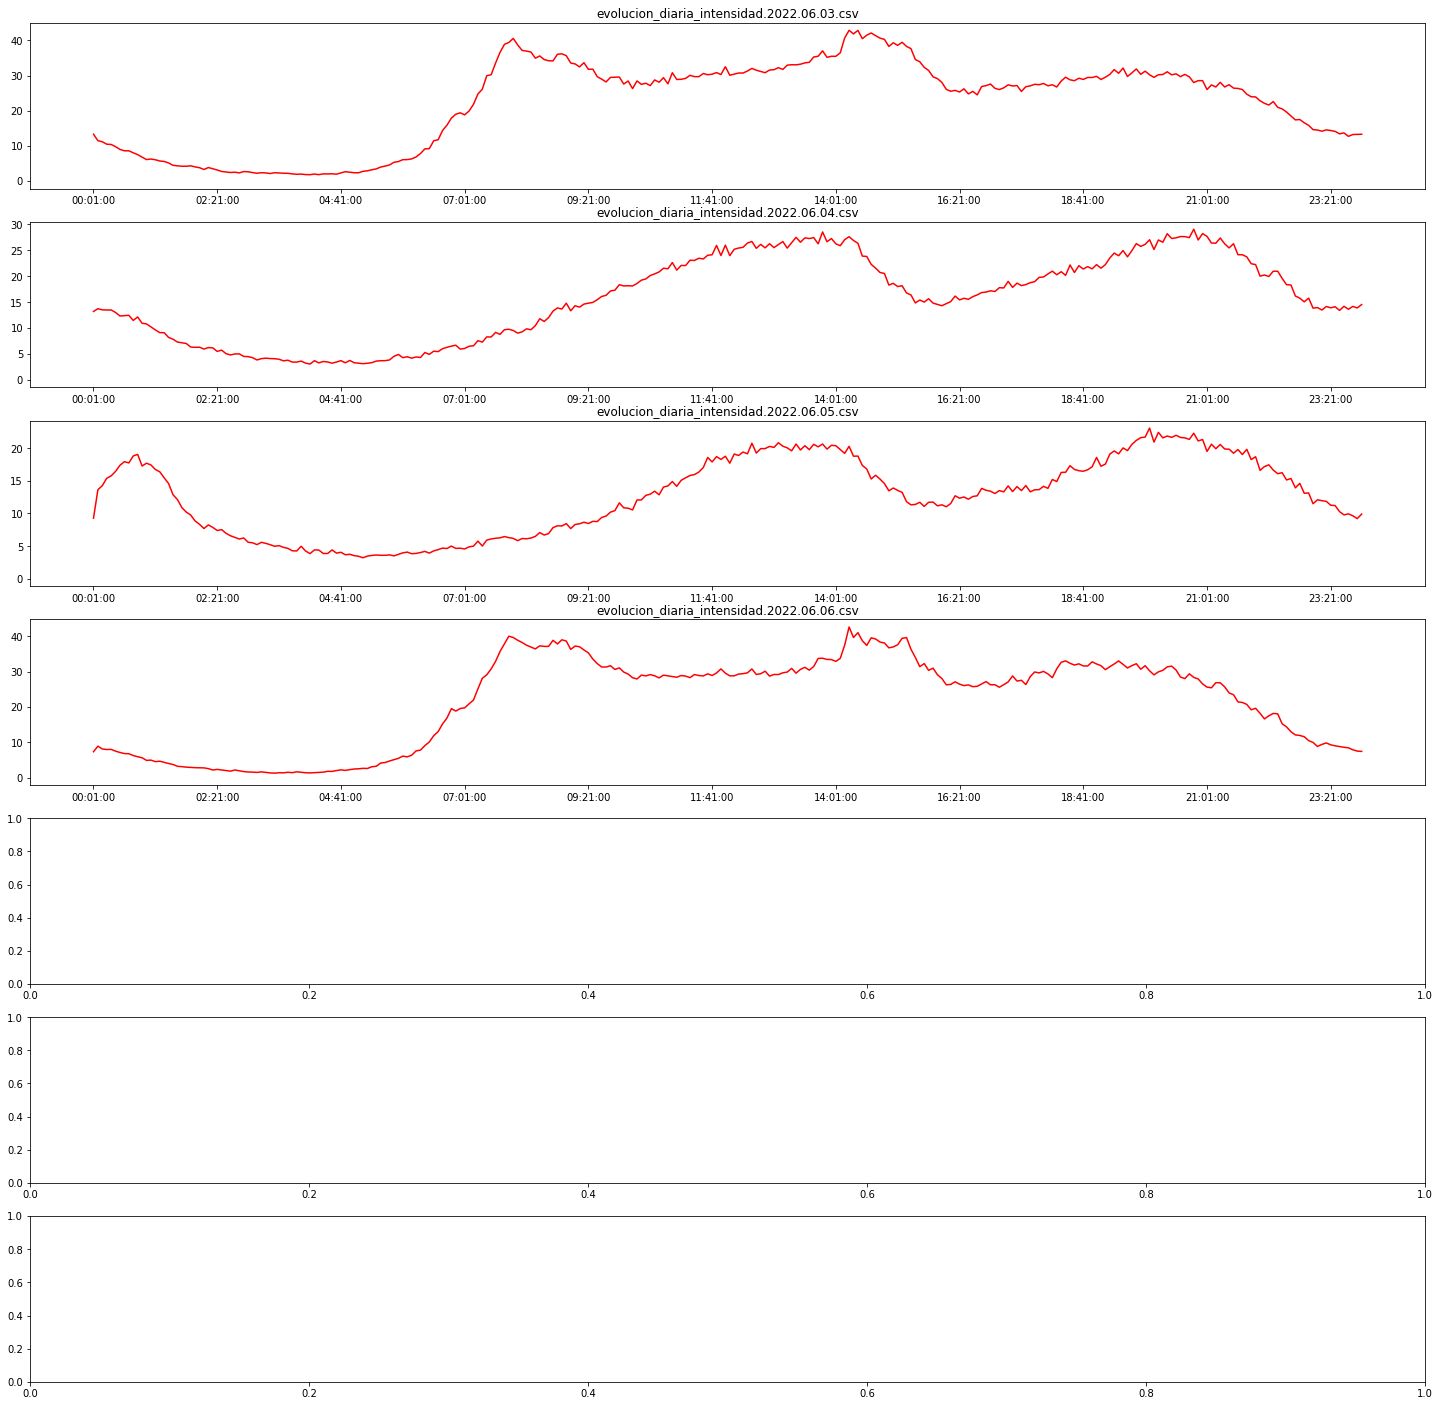

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(3,7):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2022.06.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2022.06.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-3].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-3].set_xticks(xticks)
  axs[i-3].set_title(fileSelected)
  axs[i-3].plot(df, color='r')

#Partido Sevilla

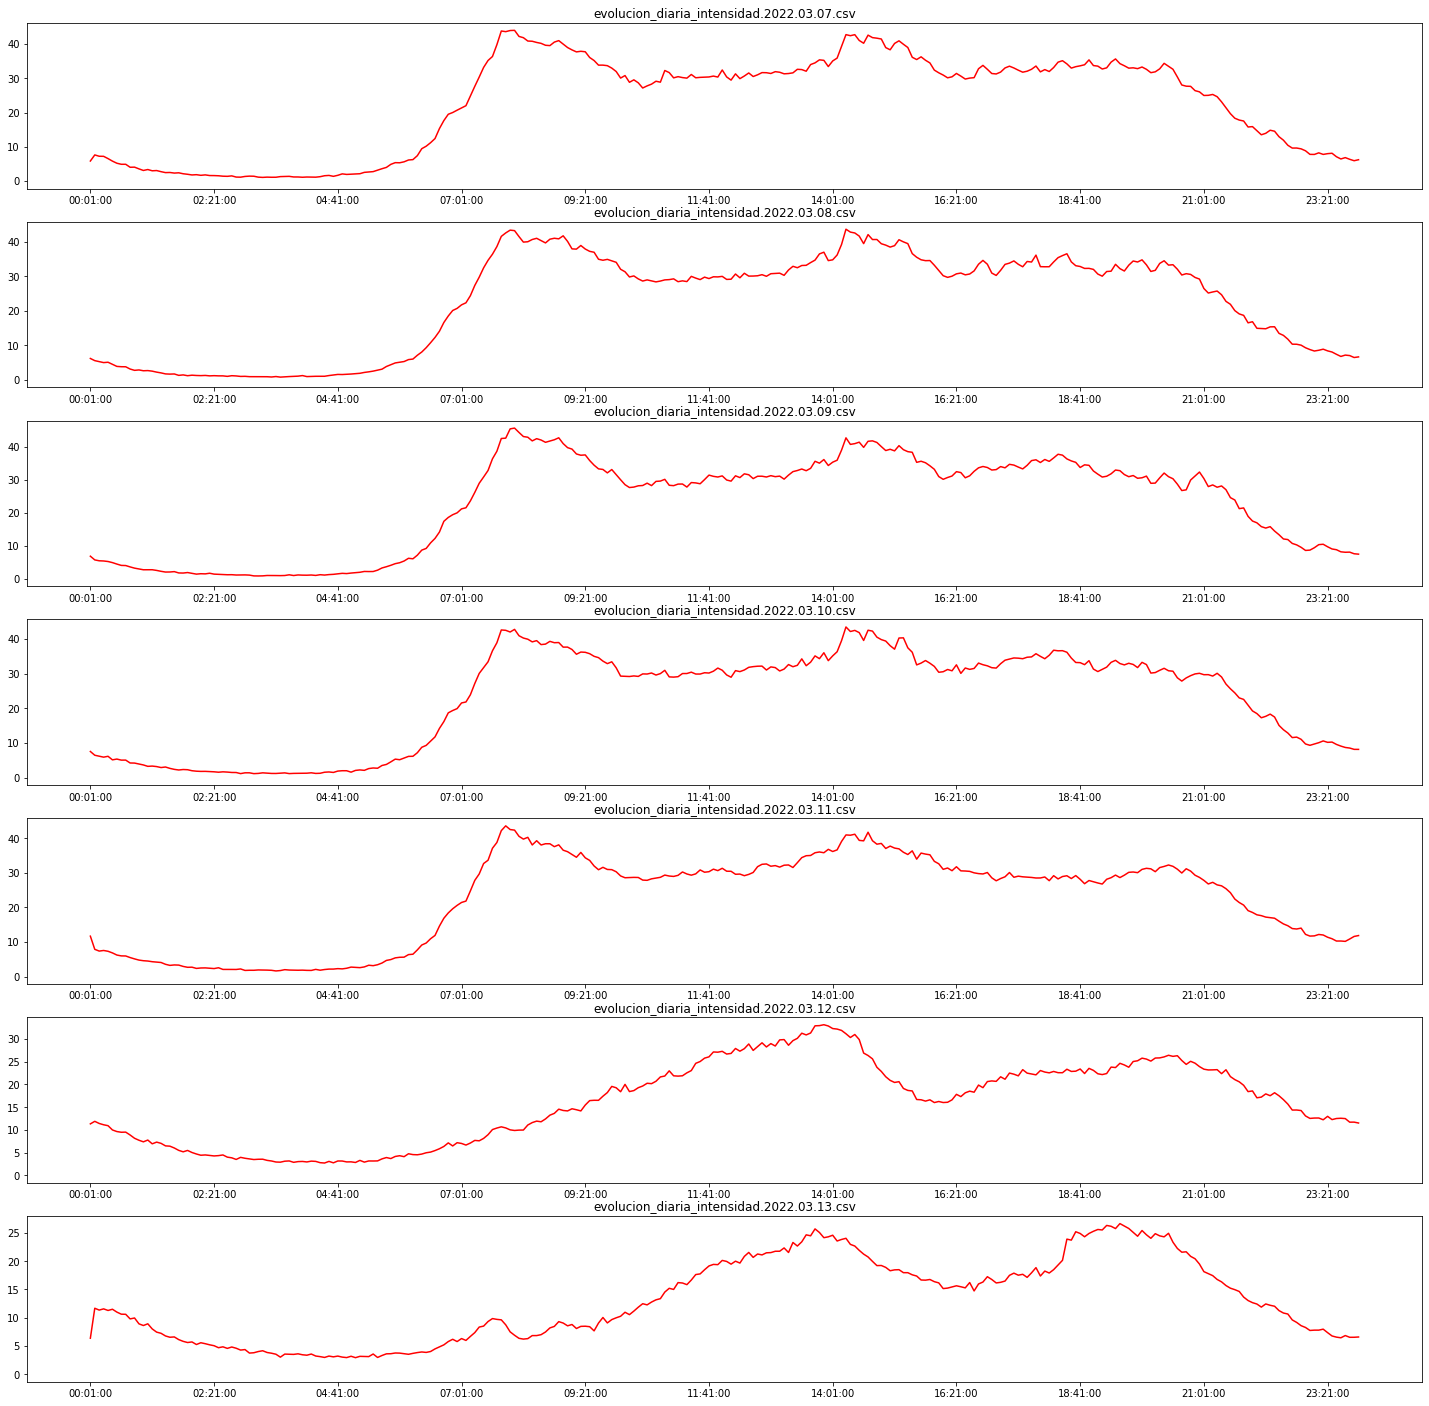

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(7,14):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2022.03.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2022.03.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-7].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-7].set_xticks(xticks)
  axs[i-7].set_title(fileSelected)
  axs[i-7].plot(df, color='r')